In [0]:
import matplotlib.pyplot as plt
import numpy as np

## Response Linearity

In [0]:
X = np.random.normal(loc=30, scale=25, size=50)
Y0 = 50 + 3*np.sqrt(np.maximum(X, 0))
tau = 90 + np.exp(0.05*X) - Y0
Y1 = Y0 + tau

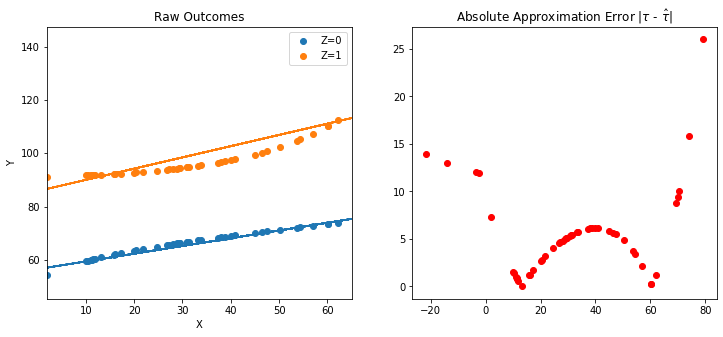

In [40]:
plt.figure(figsize=(12, 5))
plt.subplot(121)
plt.scatter(X, Y0, label = "Z=0")
plt.scatter(X, Y1, label = "Z=1")
plt.legend()
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Raw Outcomes")
plt.xlim((2, 65))

coeff0 = np.polyfit(X, Y0, 1)
Y0_hat = coeff0[0]*X + coeff0[1]
plt.plot(X, Y0_hat)

coeff1 = np.polyfit(X, Y1, 1)
Y1_hat = coeff1[0]*X + coeff1[1]
plt.plot(X, Y1_hat)

plt.subplot(122)

plt.title(r"Absolute Approximation Error |$\tau$ - $\hat{\tau}$|")
plt.scatter(X, np.abs(tau - (Y1_hat - Y0_hat)), color="r")
plt.show()

In [41]:
print(np.mean(tau) - np.mean(Y1_hat - Y0_hat))

-7.105427357601002e-15


## TE Magnitude

In [0]:
N = 50
X = np.random.normal(loc=30, scale=25, size=N)
Y0 = 2*X + np.random.normal(loc=0, scale=3, size=N)
tau = 0.5 + np.random.normal(loc=0, scale=3, size=N)
Y1 = Y0 + tau

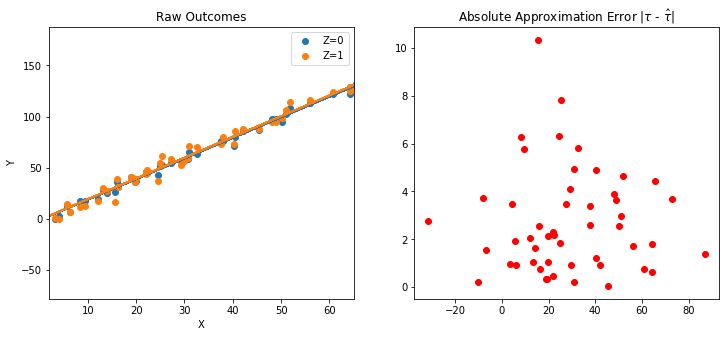

In [5]:
plt.figure(figsize=(12, 5))
plt.subplot(121)
plt.scatter(X, Y0, label = "Z=0")
plt.scatter(X, Y1, label = "Z=1")
plt.legend()
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Raw Outcomes")
plt.xlim((2, 65))

coeff0 = np.polyfit(X, Y0, 1)
Y0_hat = coeff0[0]*X + coeff0[1]
plt.plot(X, Y0_hat)

coeff1 = np.polyfit(X, Y1, 1)
Y1_hat = coeff1[0]*X + coeff1[1]
plt.plot(X, Y1_hat)

plt.subplot(122)

plt.title(r"Absolute Approximation Error |$\tau$ - $\hat{\tau}$|")
plt.scatter(X, np.abs(tau - (Y1_hat - Y0_hat)), color="r")
plt.show()

## Covariate Balance



In [0]:
X = np.random.normal(loc=30, scale=25, size=50)
Y0 = 2*X + np.random.normal(loc=0, scale=10, size=N)
tau = 4
Y1 = Y0 + tau

lower_overlap = 20
upper_overlap = 40

filter_1 = X > lower_overlap
X1 = X[filter_1]
Y1_vis = Y1[filter_1]

filter_0 = X < upper_overlap
X0 = X[filter_0]
Y0_vis = Y0[filter_0]

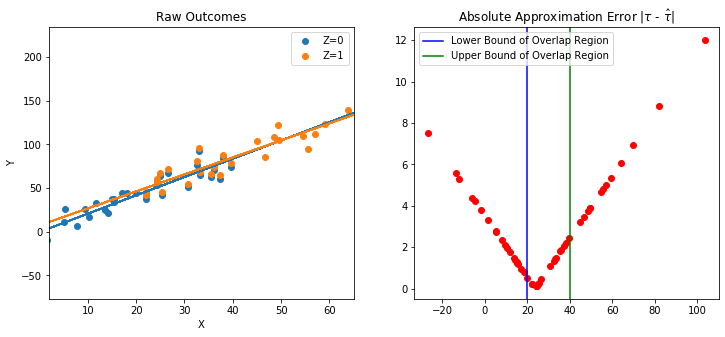

In [21]:
plt.figure(figsize=(12, 5))
plt.subplot(121)
plt.scatter(X0, Y0_vis, label = "Z=0")
plt.scatter(X1, Y1_vis, label = "Z=1")
plt.legend()
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Raw Outcomes")
plt.xlim((2, 65))

coeff0 = np.polyfit(X0, Y0_vis, 1)
Y0_hat = coeff0[0]*X + coeff0[1]
plt.plot(X, Y0_hat)

coeff1 = np.polyfit(X1, Y1_vis, 1)
Y1_hat = coeff1[0]*X + coeff1[1]
plt.plot(X, Y1_hat)

plt.subplot(122)

plt.title(r"Absolute Approximation Error |$\tau$ - $\hat{\tau}$|")
plt.scatter(X, np.abs(tau - (Y1_hat - Y0_hat)), color="r")
plt.axvline(x=lower_overlap, label="Lower Bound of Overlap Region", c="b")
plt.axvline(x=upper_overlap, label="Upper Bound of Overlap Region", c="g")
plt.legend()
plt.show()

## % treated

In [0]:
N=50
X = np.random.normal(loc=30, scale=25, size=N)
Y0 = 3*X + np.random.normal(loc=30, scale=5, size=N)
tau = 3
Y1 = Y0 + tau

filter_1 = np.random.random(size=N) < 0.25
X1 = X[filter_1]
Y1_vis = Y1[filter_1]

filter_0 = np.random.random(size=N) < 0.9
X0 = X[filter_0]
Y0_vis = Y0[filter_0]

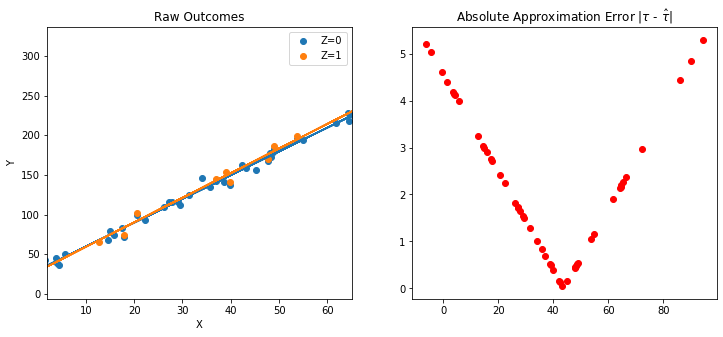

In [23]:
plt.figure(figsize=(12, 5))
plt.subplot(121)
plt.scatter(X0, Y0_vis, label = "Z=0")
plt.scatter(X1, Y1_vis, label = "Z=1")
plt.legend()
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Raw Outcomes")
plt.xlim((2, 65))

coeff0 = np.polyfit(X0, Y0_vis, 1)
Y0_hat = coeff0[0]*X + coeff0[1]
plt.plot(X, Y0_hat)

coeff1 = np.polyfit(X1, Y1_vis, 1)
Y1_hat = coeff1[0]*X + coeff1[1]
plt.plot(X, Y1_hat)

plt.subplot(122)

plt.title(r"Absolute Approximation Error |$\tau$ - $\hat{\tau}$|")
plt.scatter(X, np.abs(tau - (Y1_hat - Y0_hat)), color="r")
plt.show()

### Treat Mechanism Nonlinearity

In [2]:
N=50
X_mean = 30
X = np.random.normal(loc=X_mean, scale=25, size=N)

treat_logit = (X - X_mean)**3
prop_score = 1/(1+np.exp(-1*treat_logit))
treat = np.random.random(size=N) < prop_score

Y0 = 3*X + np.random.normal(loc=30, scale=7, size=N)
tau = 3
Y1 = Y0 + tau

X1 = X[treat]
Y1_vis = Y1[treat]

X0 = X[np.logical_not(treat)]
Y0_vis = Y0[np.logical_not(treat)]

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: overflow encountered in exp
  


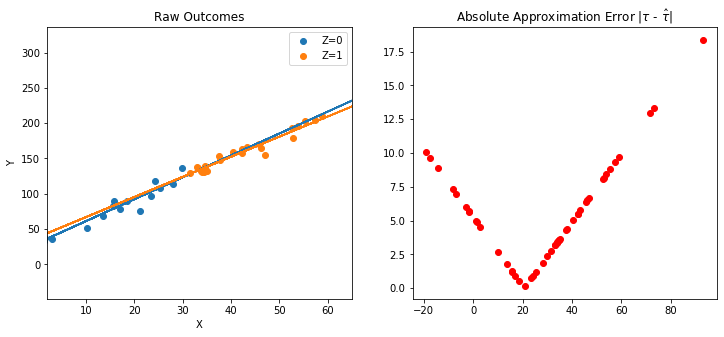

In [3]:
plt.figure(figsize=(12, 5))
plt.subplot(121)
plt.scatter(X0, Y0_vis, label = "Z=0")
plt.scatter(X1, Y1_vis, label = "Z=1")
plt.legend()
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Raw Outcomes")
plt.xlim((2, 65))

coeff0 = np.polyfit(X0, Y0_vis, 1)
Y0_hat = coeff0[0]*X + coeff0[1]
plt.plot(X, Y0_hat)

coeff1 = np.polyfit(X1, Y1_vis, 1)
Y1_hat = coeff1[0]*X + coeff1[1]
plt.plot(X, Y1_hat)

plt.subplot(122)

plt.title(r"Absolute Approximation Error |$\tau$ - $\hat{\tau}$|")
plt.scatter(X, np.abs(tau - (Y1_hat - Y0_hat)), color="r")
plt.show()